# <p align="center">**5.2 Tiamat: Treinamento do Modelo & Função Objetivo** 🎯</p>

##### <p align="center">**Autores:**  Glauber Nascimento, Júlia Guedes & Lorena Ribeiro</p>
##### <p align="center">**Orientador:**  Daniel Roberto Cassar </p>


<div style="background-color: lightblue; font-size: 18px; padding: 10px;">
<div style="text-align: justify"><strong>Objetivo:</strong> Treinamento da rede neural utilizada na função objetivo </div>

## 💡**Introdução**

<p align="justify">
O presente notebook faz parte de um conjunto de atividades referentes a implementação de um algoritmo genético para a descoberta de propriedades que levem a um aumento da dureza de um material. Nesse arquivo, em específico, modelos foram treinados e avaliados para a composição da função objetivo que será utilizada para a evolução do algoritmo genético no notebook "5.2 - Implementação do Algoritmo Genético".
</p>

<p align="justify">
Aqui o desempenho de dois tipos de algoritmos de Aprendizado de máquina (k-NN e Árvores de Decisão) serão avaliados e, o que obtiver o menor valor de Root Mean Squeared Error (RMSE), será utilizado para a composição da função objetivo. Essa, por sua vez, irá computar a previsão com base nas <em>features</em> do candidato.
</p>


## 📚**Importação de bibliotecas & Dataset**

Em primeiro lugar, precisamos importar as bibliotecas necessárias para a resolução do problema, assim como o dataset mencionado na introdução ("Mineral_Dataset_Supplementary_Info.csv"). Para evitar a presença de dados faltantes, o dropna será executado, assim como a exclusão da coluna referente aos indíces do dados. 

In [6]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns 

import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [7]:
minerais = pd.read_csv("Mineral_Dataset_Supplementary_Info.csv").dropna().drop(columns=["Unnamed: 0"])
display(minerais)

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755
...,...,...,...,...,...,...,...,...,...,...,...,...
617,3.8,46.0,9.133000,23.000000,4.000000,48.719500,9.877100,2.115000,1.905000,1.120000,0.478880,4.566500
618,4.5,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388
619,4.0,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166
620,7.5,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555


A fim de melhorar o desempenho dos modelos, os outliers encontrados no arquivo "Análise dos dados & Cria candidato" serão removidos aqui antes do treinamento do modelo.

In [8]:
indices_zeros = minerais.index[minerais["val_e_Average"] == 0].tolist()
print(indices_zeros)
print(len(indices_zeros))
 
indices_zeros2 = minerais.index[minerais["allelectrons_Average"] == 0].tolist()
print(indices_zeros2)
print(len(indices_zeros2))
 
indices_zeros3 = minerais.index[minerais["allelectrons_Total"] == 0].tolist()
print(indices_zeros3)
print(len(indices_zeros3))
 
indices_zeros4 = minerais.index[minerais["ionenergy_Average"] == 0].tolist()
print(indices_zeros4)
print(len(indices_zeros4))
 
indices_zeros5 = minerais.index[minerais["atomicweight_Average"] == 0].tolist()
print(indices_zeros5)
print(len(indices_zeros5))
 
indices_zeros6 = minerais.index[minerais["el_neg_chi_Average"] == 0].tolist()
print(indices_zeros6)
print(len(indices_zeros6))

[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10


In [9]:
minerais = minerais.drop(index=[150, 156, 317, 387, 388, 389, 390, 391, 392, 552])
minerais.head(151)

,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2.5,552.0,42.521292,7.666667,3.888889,15.272095,11.770372,2.606111,1.497222,0.762222,0.606304,0.590573
147,2.5,564.0,54.029292,7.833333,4.055556,15.718351,11.493639,2.656111,1.515556,0.735556,0.604317,0.750407
148,2.5,720.0,116.129292,10.000000,3.888889,20.528928,11.813072,2.692778,1.548889,0.735556,0.601609,1.612907
149,6.5,222.0,23.348983,8.880000,4.400000,17.918277,11.727840,2.761200,1.571200,0.748800,0.574341,0.933959


Para o split, os dados serão divididos em treino e teste pela função "train_test_split" da biblioteca scikit-lean, sendo 90% dos dados para treino e 10% para teste.

In [10]:
semente_aleatoria = 71012
tamanho_teste = 0.1

indices = minerais.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=semente_aleatoria, shuffle=True
)

minerais_treino = minerais.loc[indices_treino]
minerais_teste = minerais.loc[indices_teste]

Finalmente, para facilitar a manipulação desses dados, esses serão convertidos em arrays Numpy, pelo método values. 

In [11]:
X_treino = minerais_treino.drop(columns=["Hardness"]).values
X_teste = minerais_teste.drop(columns=["Hardness"]).values

y_treino = minerais_treino["Hardness"].values.ravel()
y_teste = minerais_teste["Hardness"].values.ravel()

## 🏋🏻‍♀️**Treinamento dos modelos**

Como mencionado, dois modelos serão treinados: k-NN e árvore de decisão. Para evitar passos adicionais de otimização de hiperparâmetros, os valores padrões do Scikit-Learn serão utilizados. Como principais diferenças dentre os modelos, o k-NN, por ser um modelo baseado em distância, precisará de uma normalização dos dados antes do treinamento. 

In [12]:
knn = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
knn.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [13]:
arvore_decisao = DecisionTreeRegressor()
arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor()

## 📊 **Análise dos resultados**

Com os modelos treinados, podemos validar os resultados a partir de validaçõa cruzada, como o Root Mean Squared Error (RMSE, do português Raiz quadrada do erro quadrático médio). 

In [14]:
scores_knn= cross_val_score(knn, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_knn = np.mean(scores_knn)
print(f"A média das métricas de RMSE do modelo KNN foi de {-RMSE_knn}")

scores_arvore_decisao= cross_val_score(arvore_decisao, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_arvore_decisao = np.mean(scores_arvore_decisao)
print(f"A média das métricas de RMSE do modelo árvore de decisao foi de {-RMSE_arvore_decisao} K.")

A média das métricas de RMSE do modelo KNN foi de 1.5683407437222647
A média das métricas de RMSE do modelo árvore de decisao foi de 2.093210516575705 K.


A partir do resultado, é válido considerar que o k-NN foi um melhor modelo em comparação a árvore de decisão. Podemos visualizar esse resultado a partir de um gráfico da comparação entre os valores reais e previstos.

In [15]:
y_pred = knn.predict(X_teste)

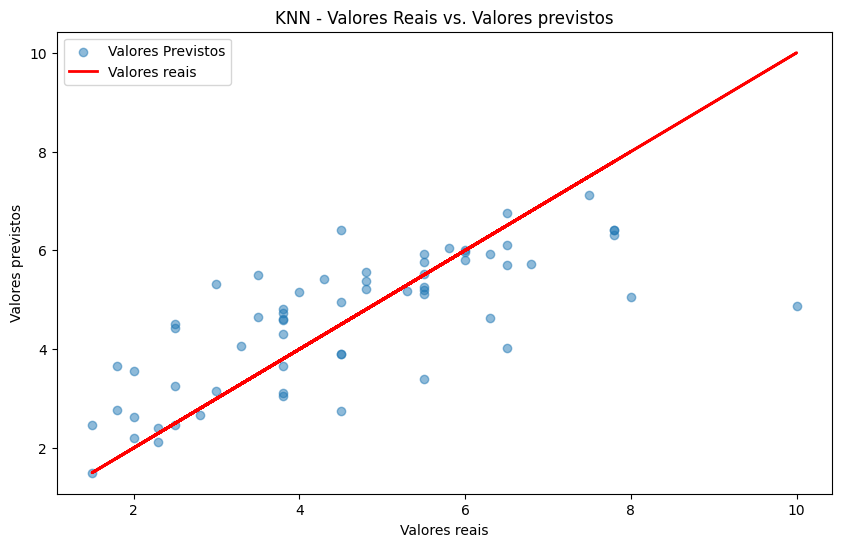

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_pred, alpha=0.5, label='Valores Previstos')

plt.plot(y_teste, y_teste, color='red', label='Valores reais', linewidth=2)

plt.title('KNN - Valores Reais vs. Valores previstos')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.show()

Não há padrão evidente nas previsões, o que pode indicar o bom desempenho do modelo. Entretanto, considerando a pequena quantidade de dados analisados, não é possível ter certeza em relação ao desempenho. Finalmente, é possível comparar a distribuição dos dados reais com os dados previstos pelo modelo.

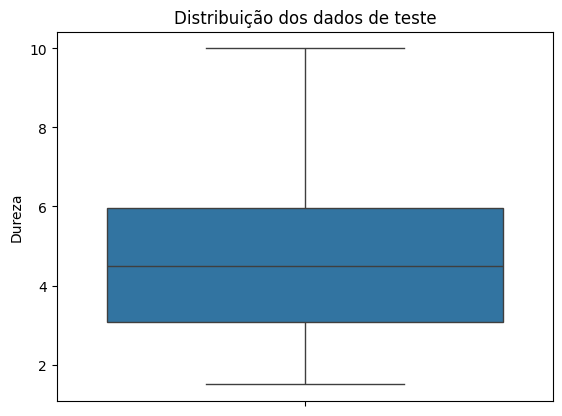

In [17]:
sns.boxplot(y_teste)
plt.title("Distribuição dos dados de teste")
plt.ylabel("Dureza")
plt.show()

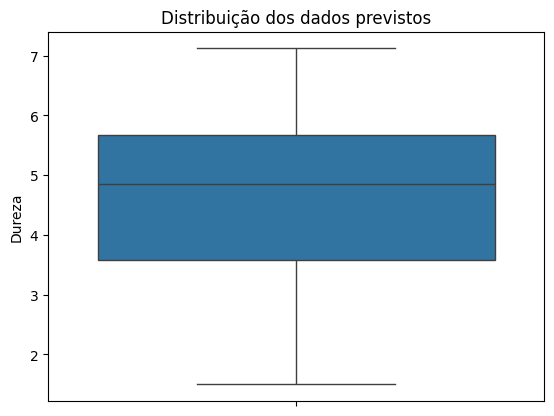

In [18]:
sns.boxplot(y_pred)
plt.title("Distribuição dos dados previstos")
plt.ylabel("Dureza")
plt.show()

É possível notar que os dados previstos apresentam uma distribuição menor do que a dos dados reais. No entanto, a média é bem semelhante nos dois casos, o que pode ser um indicativo de que o modelo foi capaz de capturar bem o padrão dos dados.
 
Para a utilização posterior do modelo, podemos salvá-lo a partir do módulo Pickle.

In [19]:
with open("knn.pkl", "wb") as modelo:
    pickle.dump(knn, modelo)
    modelo.close()

A partir desse modelo. É possível estabelecer a função objetivo, a qual consiste na previsão da dureza com base nas *features* do candidato. A fim de automatizar esse processo, a função ```funcao_objetivo_pop_ag``` será criado, a qual calcula a função objetivo para cada candidato da população.

In [20]:
def funcao_objetivo_feature(candidato):
    """Computa a função objetivo no problema de otimização da dureza

    Args:
      candidato: uma lista contendo os candidatos para a resolução do problema

    """
    previsao = modelo.predict(np.array(candidato).reshape(1, -1))
    return previsao



def funcao_objetivo_pop_feature(populacao):
    """Computa a função objetivo para uma população no problema de otimização da dureza

    Args:
      populacao: lista contendo os individuos do problema

    """
    fitness = []
    for individuo in populacao:
        fitness.append(funcao_objetivo_feature(individuo))
    return fitness

## 😁 **Conclusão**

Ao final, com base no cálculo do RMSE, foi determinado que o k-NN apresentou melhor desempenho do que a árvore de decisão e, portanto, esse modelo foi escolhido para compor a função objetivo.                                                                                                                                                                                                        